In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/media prediction and its cost.csv')

In [3]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [5]:
df.isnull().any()

food_category                 False
food_department               False
food_family                   False
store_sales(in millions)      False
store_cost(in millions)       False
unit_sales(in millions)       False
promotion_name                False
sales_country                 False
marital_status                False
gender                        False
total_children                False
education                     False
member_card                   False
occupation                    False
houseowner                    False
avg_cars_at home(approx)      False
avg. yearly_income            False
num_children_at_home          False
avg_cars_at home(approx).1    False
brand_name                    False
SRP                           False
gross_weight                  False
net_weight                    False
recyclable_package            False
low_fat                       False
units_per_case                False
store_type                    False
store_city                  

In [37]:

from sklearn.preprocessing import LabelEncoder

def encoder(data, variable):  # Corrected parameter name to 'variable'
    lb = LabelEncoder()
    df[variable] = lb.fit_transform(df[variable])

In [7]:
#encoding categorical feature
encoder(df,'food_category')
encoder(df,'food_department')
encoder(df,'food_family')
encoder(df,'promotion_name')
encoder(df,'sales_country')
encoder(df,'marital_status')

<Axes: ylabel='unit_sales(in millions)'>

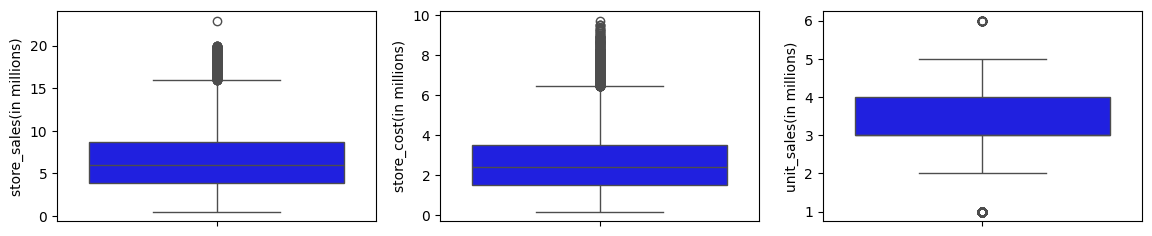

In [8]:
#checking outliersusing boxplot
plt.figure(figsize=(14,6))
plt.subplot(231)
sns.boxplot(df['store_sales(in millions)'],color='b')
plt.subplot(232)
sns.boxplot(df['store_cost(in millions)'],color='b')
plt.subplot(233)
sns.boxplot(df['unit_sales(in millions)'],color='b')

In [9]:
df.describe()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,total_children,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,25.675779,11.450685,1.099325,6.541031,2.619460,3.093169,25.525402,1.578010,0.502333,2.533875,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,14.402245,6.106293,0.523306,3.463047,1.453009,0.827677,13.887837,0.612469,0.499999,1.490165,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.000000,0.000000,0.000000,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,15.000000,5.000000,1.000000,3.810000,1.500000,3.000000,15.000000,1.000000,0.000000,1.000000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,27.000000,12.000000,1.000000,5.940000,2.385600,3.000000,26.000000,2.000000,1.000000,3.000000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,41.000000,17.000000,1.000000,8.670000,3.484025,4.000000,38.000000,2.000000,1.000000,4.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,44.000000,21.000000,2.000000,22.920000,9.726500,6.000000,48.000000,2.000000,1.000000,5.000000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


<ipython-input-10-c9dfe9fa3333>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['store_sales(in millions)'],color='r')
<ipython-input-10-c9dfe9fa3333>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


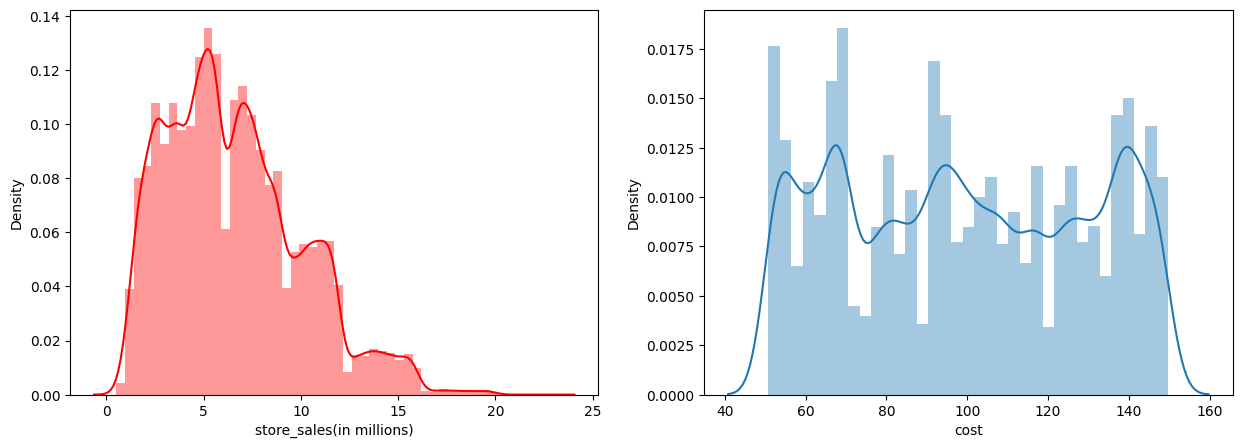

In [10]:
#plotting the using displot
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['store_sales(in millions)'],color='r')
plt.subplot(122)
sns.distplot(df['cost'])
plt.show()

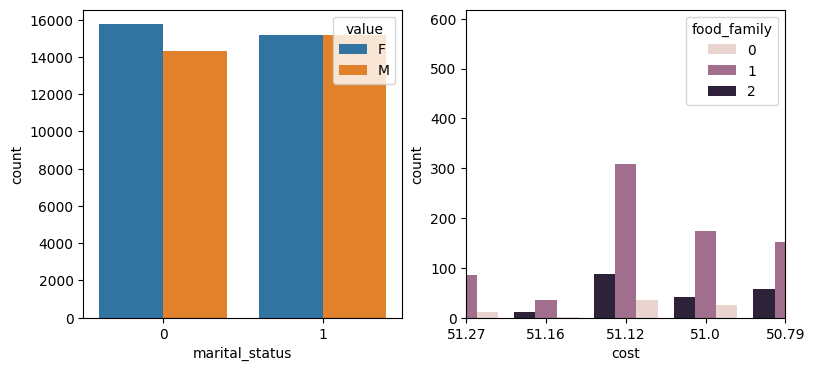

In [11]:
# Change to long-form data using melt
df_melted = df.melt(id_vars=['marital_status'], value_vars=['gender'])

plt.figure(figsize=(14,4))
plt.subplot(131)
#plt.ylim(0, 100)
sns.countplot(data=df_melted, x='marital_status', hue='value')
plt.subplot(132)
sns.countplot(data=df, x='cost', hue='food_family')
plt.xlim(4,0)
plt.show()

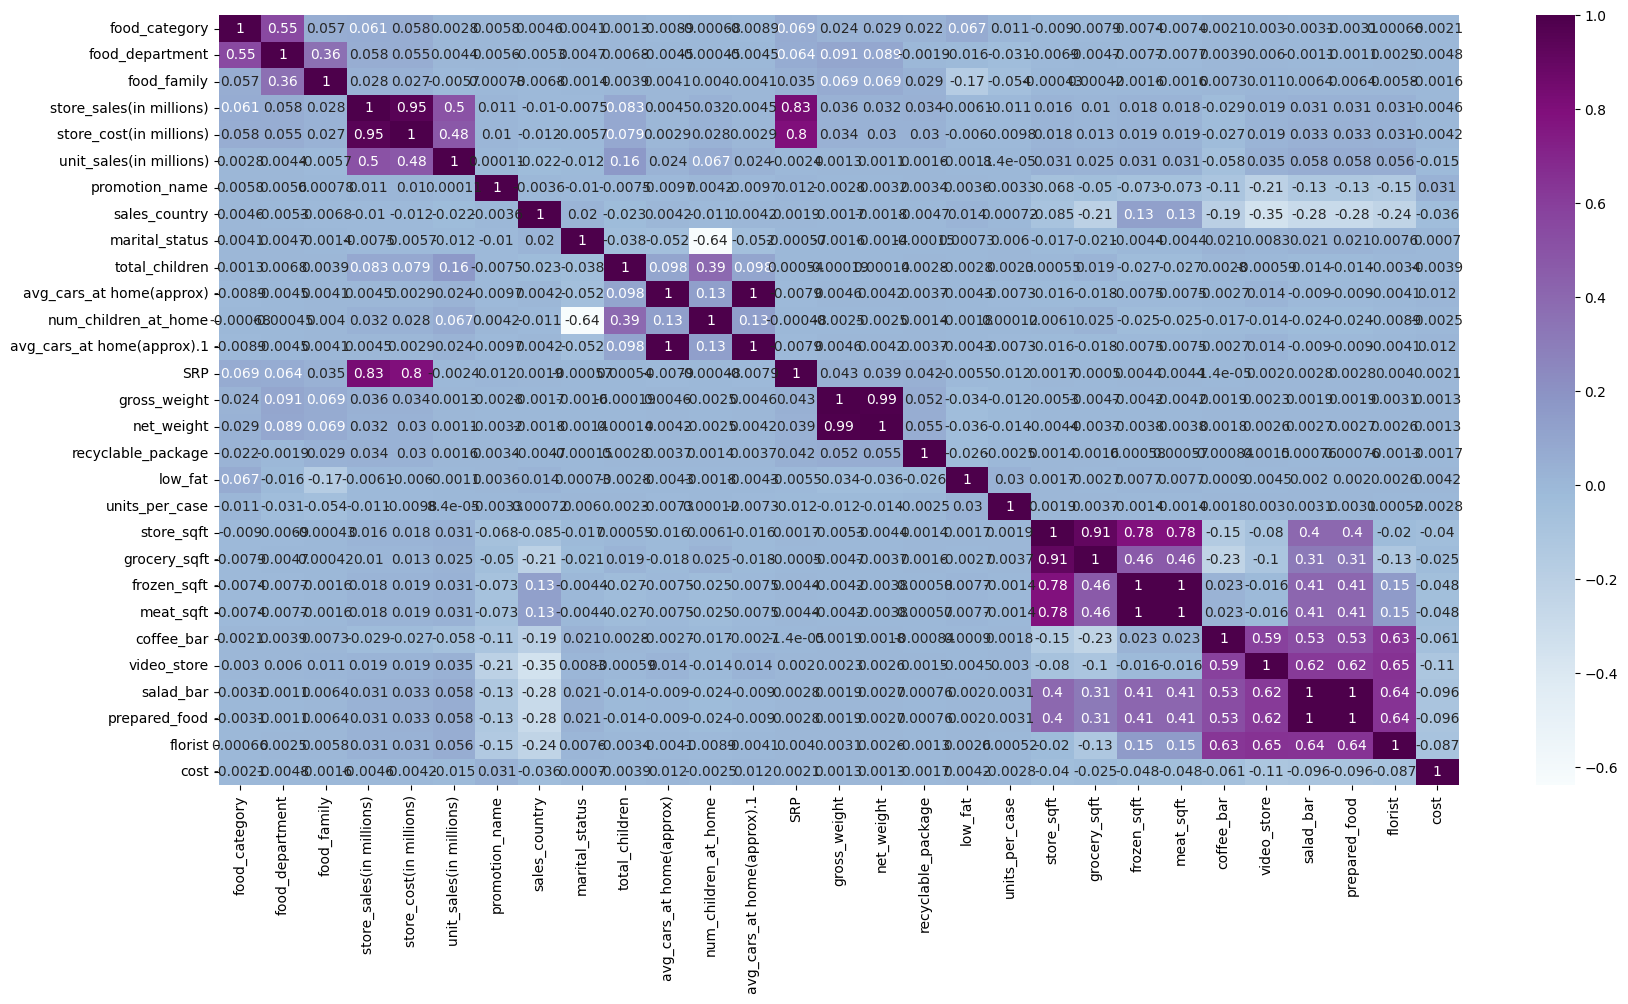

In [12]:
numeric_df=df.select_dtypes(include=[np.number])
corr=numeric_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap="BuPu")#, vmin=0.8, vmax=1,)
plt.show()

In [13]:
#Applying PCA
from sklearn.decomposition import PCA

In [24]:
X = df.select_dtypes(include=[np.number])
pca=PCA(n_components=8)
data_pca=pca.fit_transform(X)

In [22]:
data_pca

array([[-4.68079507e+02, -3.12737072e+02,  2.70478584e+01, ...,
         2.08936187e+00,  9.48130636e+00,  4.68481032e+00],
       [-4.68069680e+02, -3.12767845e+02, -3.96008537e+01, ...,
         2.11812410e+00,  9.45697965e+00,  4.55780298e+00],
       [-4.68075112e+02, -3.12752592e+02, -1.51108552e+01, ...,
         2.01163168e+00,  9.41051638e+00,  4.50161656e+00],
       ...,
       [-6.80974887e+03, -1.70269748e+02, -3.24361749e+01, ...,
        -7.21600827e+00,  7.40200866e+00, -9.52333415e+00],
       [ 9.53441609e+03,  4.69675497e+03,  3.29203797e+01, ...,
        -7.00661830e+00,  7.48292054e+00, -9.40931560e+00],
       [ 9.53442241e+03,  4.69673511e+03, -1.20858538e+01, ...,
        -9.96551022e+00,  9.55187274e+00, -9.62121071e+00]])

In [23]:
data_pca.shape

(60428, 8)

In [25]:
X = data_pca
Y = df['cost']

In [26]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y_train, Y_test = train_test_split(X , Y,test_size=0.3,random_state=0)
X1_train.shape,X1_test.shape

((42299, 8), (18129, 8))

RandomForest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X1_train,Y_train)
y_pred=rf.predict(X1_test)
x_pred=rf.predict(X1_train)
score=r2_score(Y_test,y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
score1=r2_score(Y_train,x_pred)
rmse1=np.sqrt(mean_squared_error(Y_train,x_pred))

print('---****---random Forest Regressor model---****---')
print('Model performance for test set')
print('R2 Score = ',score)
print('RMSE = ',rmse)

print('--------------------------------')
print('Model performance for Test set')
print('R2_Score = ',score)
print('RMSE = ',rmse)

print('----------------------------------')
print('Model performance for Train set')
print('R2_Score = ',score1)
print('RMSE = ',rmse1)


---****---random Forest Regressor model---****---
Model performance for test set
R2 Score =  0.9999992223770472
RMSE =  0.026495659012272195
--------------------------------
Model performance for Test set
R2_Score =  0.9999992223770472
RMSE =  0.026495659012272195
----------------------------------
Model performance for Train set
R2_Score =  0.9999999370963878
RMSE =  0.007523146092761905


Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Dtr=DecisionTreeRegressor()
Dtr.fit(X1_train,Y_train)
y_pred=Dtr.predict(X1_test)
x_pred=Dtr.predict(X1_train)
score=r2_score(Y_test,y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
score1=r2_score(Y_train,x_pred)
rmse1=np.sqrt(mean_squared_error(Y_train,x_pred))
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)

print('---****---Decision Tree Regressor model---****---')
print('Model performance for test set')
print('R2 Score = ',score)
print('RMSE = ',rmse)

print('--------------------------------')
print('Model performance for Test set')
print('R2_Score = ',score1)
print('RMSE = ',rmse1)
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)

---****---Decision Tree Regressor model---****---
Model performance for test set
R2 Score =  0.999999475396002
RMSE =  0.021762359911033424
--------------------------------
Model performance for Test set
R2_Score =  1.0
RMSE =  2.7555815953433333e-13
mean_absolute_error:  0.0002487726848418434
mean_squared_error:  0.00047360030889735465


Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X1_train,Y_train)
y_pred=gb.predict(X1_test)
x_pred=rf.predict(X1_train)
score=r2_score(Y_test,y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
score1=r2_score(Y_train,x_pred)
rmse1=np.sqrt(mean_squared_error(Y_train,x_pred))
print('---****---Gradient Boosting Regressor model---****---')
print('Model performance for test set')
print('R2 Score = ',score)
print('RMSE = ',rmse)

print('--------------------------------')
print('Model performance for Test set')
print('R2_Score = ',score1)
print('RMSE = ',rmse1)

---****---Gradient Boosting Regressor model---****---
Model performance for test set
R2 Score =  0.9998527192407322
RMSE =  0.36463906787159356
--------------------------------
Model performance for Test set
R2_Score =  0.9999999370963878
RMSE =  0.007523146092761905


In [30]:
#test random forest regressor
example=[['27694','18670','20','4','0','17','17.7','12']]
result=rf.predict(example)
print(result)

[120.5412]


In [31]:
example=[['27694','18670','20','4','0','17','17.7','12']]
result=gb.predict(example)
print(result)

[120.77135124]


In [32]:
example=[['27694','18670','20','4','0','17','17.7','12']]
result=Dtr.predict(example)
print(result)

[119.35]


In [33]:
import pickle
pickle.dump(rf,open('customers.pkl','wb'))

In [38]:
food_category_le = LabelEncoder()
food_category_le.fit(df['food_category'])
df['food_category'] = food_category_le.transform(df['food_category'])

In [39]:
food_department_le = LabelEncoder()
food_department_le.fit(df['food_department'])
df['food_department'] = food_department_le.transform(df['food_department'])

In [40]:
brand_name_le = LabelEncoder()
brand_name_le.fit(df['brand_name'])
df['brand_name'] = brand_name_le.transform(df['brand_name'])

In [41]:
promotion_name_le = LabelEncoder()
promotion_name_le.fit(df['promotion_name'])
df['promotion_name'] = promotion_name_le.transform(df['promotion_name'])

In [42]:
sales_country_le = LabelEncoder()
sales_country_le.fit(df['sales_country'])
df['sales_country'] = sales_country_le.transform(df['sales_country'])

In [43]:
marital_status_le = LabelEncoder()
marital_status_le.fit(df['marital_status'])
df['marital_status'] = marital_status_le.transform(df['marital_status'])

In [44]:
store_city_le = LabelEncoder()
store_city_le.fit(df['store_city'])
df['store_city'] = store_city_le.transform(df['store_city'])

In [47]:
pickle.dump(food_category_le,open('food_category_le.pkl','wb'))
pickle.dump(food_department_le,open('food_department_le.pkl','wb'))
pickle.dump(brand_name_le,open('brand_name_le.pkl','wb'))
pickle.dump(promotion_name_le,open('promotion_name_le.pkl','wb'))
pickle.dump(sales_country_le,open('sales_country_le.pkl','wb'))
pickle.dump(marital_status_le,open('marital_status_le.pkl','wb'))
pickle.dump(store_city_le,open('store_city_le.pkl','wb'))